In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Status']=data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
selectkbest = SelectKBest(score_func=chi2, k=10)
Xkbest = selectkbest.fit_transform(X, y)
print("\nShape selectKBest (k=10):", Xkbest.shape)


Shape selectKBest (k=10): (569, 10)


In [ ]:
Xkbest_indices = selectkbest.get_support(indices=True)
print("\nIndices of selected features:", Xkbest_indices)
xkbest_df=df.iloc[:,Xkbest_indices]
xkbest_df.head()


Indices of selected features: [ 0  1  2  3 12 13 20 21 22 23]


,mean radius,mean texture,mean perimeter,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0


In [ ]:
select_percentile = SelectPercentile(score_func=chi2, percentile=20)
X_percentile = select_percentile.fit_transform(X, y)
print("Shape SelectPercentile (20%):", X_percentile.shape)

Shape SelectPercentile (20%): (569, 6)


In [ ]:
Xper_indices = select_percentile.get_support(indices=True)
print("\nIndices of selected features:", Xper_indices)
xper_df=df.iloc[:,Xper_indices]
xper_df.head()


Indices of selected features: [ 2  3 13 20 22 23]


,mean perimeter,mean area,area error,worst radius,worst perimeter,worst area
0,122.80,1001.0,153.40,25.38,184.60,2019.0
1,132.90,1326.0,74.08,24.99,158.80,1956.0
2,130.00,1203.0,94.03,23.57,152.50,1709.0
3,77.58,386.1,27.23,14.91,98.87,567.7
4,135.10,1297.0,94.44,22.54,152.20,1575.0


In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print("Shape after PCA (5 components):", X_pca.shape)

Shape after PCA (5 components): (569, 5)


In [ ]:
pca_indices=np.argsort(pca.explained_variance_ratio_)[::-1][:5]
print("\nIndices of selected features:", pca_indices)
pca_df=df.iloc[:,pca_indices]
pca_df.head()


Indices of selected features: [0 1 2 3 4]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [ ]:
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for PCA:", explained_variance)


Explained Variance Ratio for PCA: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


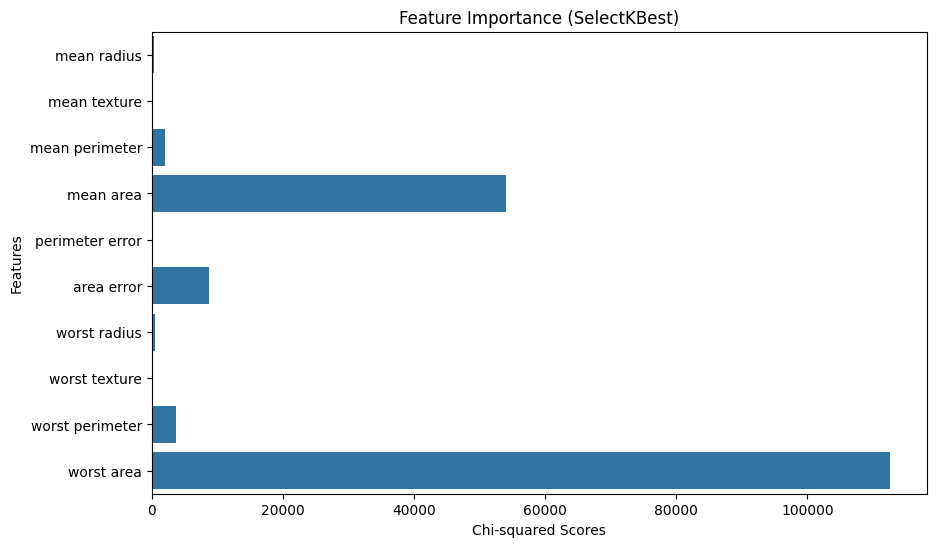

In [ ]:
# For SelectKBest
plt.figure(figsize=(10, 6))
scores = selectkbest.scores_
feature_names = X.columns[Xkbest_indices]  # Use correct feature names
sns.barplot(x=scores[Xkbest_indices], y=feature_names)
plt.xlabel("Chi-squared Scores")
plt.ylabel("Features")
plt.title("Feature Importance (SelectKBest)")
plt.show()

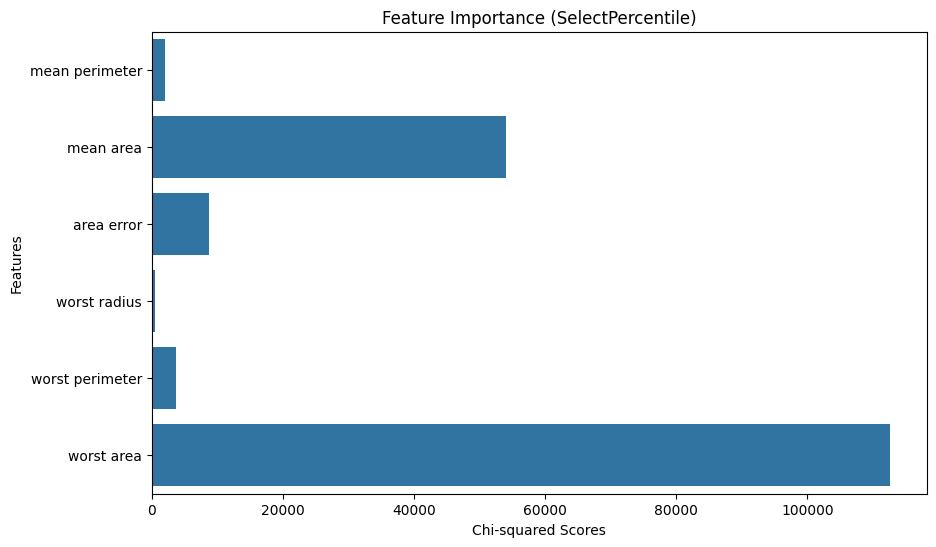

In [ ]:
# For SelectPercentile
plt.figure(figsize=(10, 6))
scores_percentile = select_percentile.scores_
feature_names_percentile = X.columns[Xper_indices]
sns.barplot(x=scores_percentile[Xper_indices], y=feature_names_percentile)
plt.xlabel("Chi-squared Scores")
plt.ylabel("Features")
plt.title("Feature Importance (SelectPercentile)")
plt.show()